In [13]:
import numpy as np
TestPerf = np.load("GeoShapes_Curriculum_FullUniform_TestPerf_Self_Paced.npy")
ValError = np.load("GeoShapes_Curriculum_FullUniform_ValAcc_Conv_Self_Paced.npy")

In [14]:
this = np.sum(np.sum(TestPerf,axis=0),axis=0)
NumComplete = 0
while this[NumComplete] >0:
    NumComplete +=1
print(NumComplete)

4


In [15]:
TestPerf = TestPerf[:,:,0:NumComplete]
ValError = ValError[:,:,0:NumComplete]

In [16]:
TestPerf_Mean = TestPerf.mean(axis=2)
TestPerf_StE = TestPerf.std(axis=2) / np.sqrt(NumComplete)

In [17]:
TestPerf_Mean

array([[0.70535399, 0.72739999],
       [0.56233352, 0.77984999],
       [1.17736486, 0.33409999],
       [2.17530912, 0.54705   ],
       [0.57165273, 0.77935   ]])

In [18]:
TestPerf_Mean + TestPerf_StE

array([[0.71763857, 0.73153097],
       [0.57105881, 0.78336594],
       [1.20075089, 0.34127861],
       [2.19403114, 0.54973083],
       [0.58107306, 0.78046439]])

In [19]:
TestPerf_Mean - TestPerf_StE

array([[0.69306941, 0.72326901],
       [0.55360824, 0.77633405],
       [1.15397882, 0.32692138],
       [2.15658711, 0.54436917],
       [0.56223239, 0.77823561]])

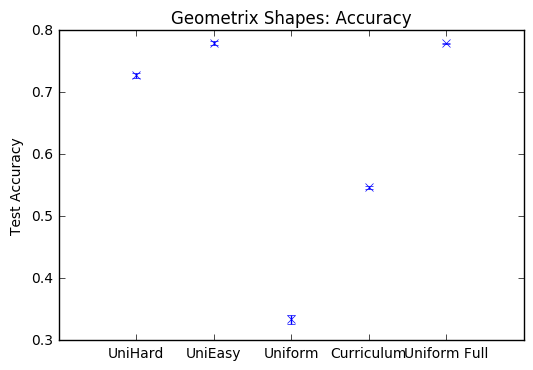

In [20]:
import matplotlib.pyplot as plt

flag = 1

labels = ['Hard','Easy','Uni','Curriculum']
plt.errorbar(np.array([1,2,3,4,5],dtype=int),TestPerf_Mean[:,flag],yerr = TestPerf_StE[:,flag],marker ='x',linestyle='none')
my_xticks = ['UniHard','UniEasy','Uniform','Curriculum','Uniform Full']
plt.xticks(np.array([1,2,3,4,5],dtype=int), my_xticks)
thisplot = plt.gca()
thisplot.set_xlim(0,6)
if flag == 0:
    thisplot.set_title('Geometrix Shapes: Error')
    thisplot.set_ylabel('Test Cross-Entropy')
else:
    thisplot.set_title('Geometrix Shapes: Accuracy')
    thisplot.set_ylabel('Test Accuracy')

plt.show()

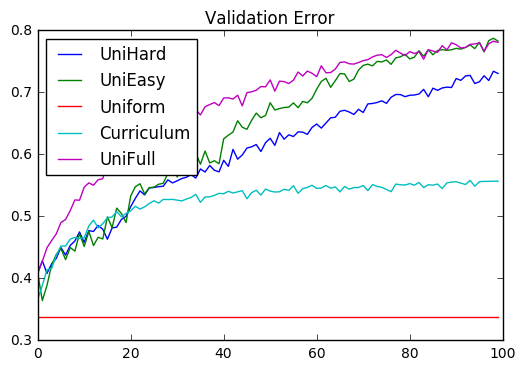

In [21]:
plt.plot(np.mean(ValError,axis=2))
plt.legend(['UniHard','UniEasy','Uniform','Curriculum','UniFull'],loc='best')
thisplot = plt.gca()
thisplot.set_title('Validation Error')
plt.show()

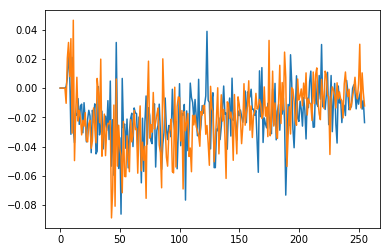

In [13]:
Diff = ValError[:,1] - ValError[:,-1]
plt.plot(Diff)
plt.show()

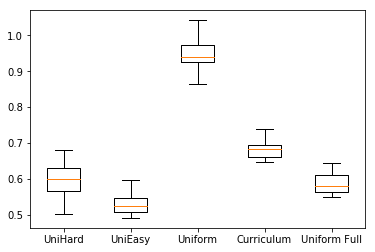

In [26]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
data = TestPerf[:,0,:]
ax.boxplot(data.T)
my_xticks =['UniHard','UniEasy','Uniform','Curriculum','Uniform Full']
plt.xticks(np.array([1,2,3,4,5],dtype=int), my_xticks)
plt.show()